For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.


Has the network latency gone up since we switched internet service providers?


Is the website redesign any good?


Is our television ad driving more sales?

# Q1) Has the network latency gone up since we switched internet service providers?


## H0: There is no network latency gone up eventhough we switched to internet service providers.

## Ha: There is network latency gone up since we switched internet service providers.

###  True Negative: accept H0 if H0 is true
The internet service provider does not affect the network lantency, and we were correct.

###  True Positive: reject H0 if H0 is false
The internet service provider does affect the network lantency, and we were correct.

### type I error: reject H0 if H0 is true
   (false positive) The internet service provider does affect the network lantency, and we were wrong.

### type II error: accept H0 if H0 is false
 (false negative) The internet service provider does not affect the network lantency, and we were wrong)

## Q2) Is the website redesign any good?


 H0: The website redesign is not good.

 Ha: The website redesign is good.


### True Negative: accept H0 if H0 is true 

The website redesign is not good, and we were correct.
 
 
 
 
### True Positive: reject H0 if H0 is false

The website redesign is  good, and we were correct.

 
 

### type I error: reject H0 if H0 is true
   (false positive)
                  
The website redesign is good, and we were wrong.

 
 
 
 
### type II error: accept H0 if H0 is false
  (false negative)
                  
The website redesign is not good, and we were wrong.


## Q3) Is our television ad driving more sales?

H0: television ad does not drive more sales.

Ha: television ad drives more sales.

### True Negative: accept H0 if H0 is true

television ad does not drive more sales, and we were correct.

###  True Positive: reject H0 if H0 is false
television ad does drive more sales, and we were correct.

### type I error: reject H0 if H0 is true
###    (false positive)
television ad does drive more sales, and we were wrong.

### type II error: accept H0 if H0 is false
###  (false negative)
television ad does not drive more sales, we were wrong.




# Comparison of Groups Exercise

In [ ]:
import pandas as pd

# Q1) Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.

                        Codeup Student	       Not Codeup Student

Uses a Macbook	             49	                         20

Doesnt Use A Macbook	     1	                         30



In [ ]:
data = {"Codeup Student":[49,1], "Not Codeup Student":[20,30]}
data

In [ ]:
pd.DataFrame(data)

In [ ]:
df=pd.DataFrame(data, index=['Uses a Macbook','Doesnt Use A Macbook'])
df

### form hypothesis and set confidence interval 

    Ho:Using a macbook and being a codeup student are independent of each other.
    Ha:Using a macbook and being a codeup student are not independent of each other.

In [ ]:
# set our alpha
alpha = 0.05

In [ ]:
from scipy import stats

In [ ]:
stats.chi2_contingency(df)

In [ ]:
chi2,p,dof,expected = stats.chi2_contingency(df)

In [ ]:
print('*************output************')
print('\nobsered')
print(df.values)
print('\nexpected')
print(expected.astype(int))
print('\n---------')
print(f'chi^2={chi2:.4f}')
print(f'p-value:{p:.8f}')


### conclude based on above values

In [ ]:
if p < alpha:
    print('reject the Ho')
else:
    print("fail to reject the Ho")

 my p< alpha, 
 
 Using a macbook and being a codeup student are not independent of each other.

# Q2)Choose another 2 categorical variables from the mpg dataset.

    - State your null and alternative hypotheses.

    - State your alpha.

    - Perform a chi2 test of independence.

    - State your conclusion

In [ ]:
from pydataset import data

In [ ]:
df=data('mpg')
df.head()

In [ ]:
df.nunique()

Question: Is there any relation between "year" and "cyl"?

Ho: there is no relation between year and cyl.

Ha: there is relation between year and cyl.

In [ ]:
aplha=0.05

In [ ]:
df.year.value_counts()

In [ ]:
df.cyl.value_counts()

In [ ]:
observed = pd.crosstab(df.year,df.cyl)
observed

In [ ]:
stats.chi2_contingency(observed)

In [ ]:
chi2,p,dof,expected=stats.chi2_contingency(observed)

In [ ]:
p

In [ ]:
chi2

In [ ]:
if p < alpha:
    print('reject the Ho')
else:
    print("fail to reject the Ho")

since p<aplha, so we reject the Ho, 
that means, there is relation between "year" and "cyl".

# Q3) Use the data from the employees database to answer these questions:

### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)



### Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
import env

In [ ]:
def get_db_url(hostname, username, password,database):
        return f"mysql+pymysql://{username}:{password}@{hostname}/{database}"

    

In [ ]:
url=get_db_url(env.hostname,env.username,env.password,'employees')

# url not leaving it printed out

In [ ]:
query='''select * from employees limit 5

'''

In [ ]:
pd.read_sql('show tables',url)

In [ ]:
pd.read_sql('describe dept_emp',url)

In [ ]:
pd.read_sql('describe employees',url)

In [ ]:
pd.read_sql('describe departments',url)

In [ ]:
query='''
select dept_name,gender,to_date from departments
join dept_emp de using(dept_no) 
join employees using(emp_no)
where de.to_date>now()
and dept_name in ('Sales','Marketing')
'''

In [ ]:
df=pd.read_sql(query,url)
df

In [ ]:
observed = pd.crosstab(df.dept_name,df.gender)
observed


Ho: There is no relationship between gender and whether or not an employees works in sales or marketing

Ha: There is relationship between gender and whether or not an employees works in sales or marketing

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed)


In [ ]:
chi2

In [ ]:
dof

In [ ]:
p

conculde:

since p>alpha, so fail to reject Ho.
There is no relationship between gender and department(sales or marketing)

## Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
query='''
select * 
from dept_manager
right join employees using(emp_no)


'''

In [ ]:
df=pd.read_sql(query,url)
df

In [ ]:
df.gender.value_counts()

In [ ]:
df.to_date.value_counts(dropna=False)

In [ ]:
df['is_manager']=df.to_date.notnull()

In [ ]:
df.head()

In [ ]:
df.is_manager.value_counts()

In [ ]:
observed = pd.crosstab(df.is_manager,df.gender)
observed

In [ ]:
stats.chi2_contingency(observed)


In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(observed)


In [ ]:
chi2

In [ ]:
p

conclude:(cal chi2 > tab chi2)
Since p>alpha, so we fail to reject Ho.
There is no relationship between gender and being a manager. 

# Correlation Exercise

## Q1)Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?

=> correlation test, pearsonr




Does smoking affect when or not someone has lung cancer?

=> chi2 test




Is gender independent of a person’s blood type?

=> chi2 test



Does whether or not a person has a cat or dog affect whether they live in an apartment?

=>chi2 test




Does the length of time of the lecture correlate with a student's grade?

=>correlation test

# Q2) Use the telco_churn data.

### - Does tenure correlate with monthly charges?

###    - Total charges?

###    - What happens if you control for phone and internet service?

In [1]:
import env
import pandas as pd
from scipy import stats

In [2]:
def get_db_url(hostname, username, password,database):
        return f"mysql+pymysql://{username}:{password}@{hostname}/{database}"

    

In [3]:
url=get_db_url(env.hostname,env.username,env.password,'telco_churn')


In [4]:
pd.read_sql('show tables',url)

,Tables_in_telco_churn
0,contract_types
1,customer_churn
2,customer_contracts
3,customer_details
4,customer_payments
5,customer_signups
6,customer_subscriptions
7,customers
8,internet_service_types
9,payment_types


In [7]:
cust=pd.read_sql('select * from customers',url)
cust.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [9]:
cust.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [11]:
cust.tenure.value_counts(bins=10).sort_index()

tenure
(-0.073, 7.2]    1612
(7.2, 14.4]       759
(14.4, 21.6]      570
(21.6, 28.8]      556
(28.8, 36.0]      545
(36.0, 43.2]      444
(43.2, 50.4]      452
(50.4, 57.6]      495
(57.6, 64.8]      501
(64.8, 72.0]     1109
Name: count, dtype: int64

In [12]:
cust.monthly_charges.value_counts()

monthly_charges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: count, Length: 1585, dtype: int64

In [13]:


pd.read_sql('select tenure, monthly_charges from customers',url)


,tenure,monthly_charges
0,9,65.60
1,9,59.90
2,4,73.90
3,13,98.00
4,3,83.90
...,...,...
7038,13,55.15
7039,22,85.10
7040,2,50.30
7041,67,67.85


In [42]:
import seaborn as sns

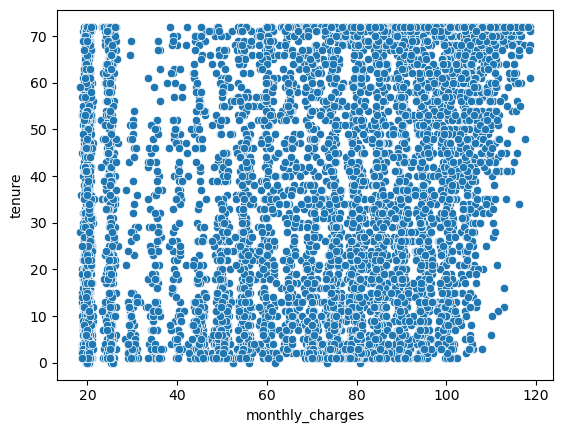

In [44]:
sns.scatterplot(data=cust,x='monthly_charges',y='tenure');

    Set up Hypothesis:---- 

         $H    : There is no linear relationship between tenure and monthly_charges.

         Ha : There is linear relationship between tenure and monthly_charges.

In [20]:
alpha=0.05


In [14]:
stats.pearsonr(cust.tenure,cust.monthly_charges)

PearsonRResult(statistic=0.24789985628615246, pvalue=4.094044991476844e-99)

In [16]:
r,p=stats.pearsonr(cust.tenure,cust.monthly_charges)

In [17]:
r

0.24789985628615246

In [18]:
p

4.094044991476844e-99

In [21]:
if p < alpha:
    print('reject the Ho')
else:
    print("fail to reject the Ho")

reject the Ho


Conclusion:
Since p<aplha, so reject the Ho.
There is a linear a relationship between tenure and monthly_charges

Set up the Hypothesis:

Ho: There is no linear relationship between tenure and total_charges

Ha: There is linear relationship between tenure and total_charges.

In [22]:
df=pd.read_sql('select * from customers',url)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [24]:
df.total_charges.value_counts()

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

here in the 'total_charges' there are 11 records empty ( not it is nan) and it is object(string) data type. 
so before we calculating further, we must have to convert into floa and doing sonethng on the single space data also.

In [27]:
# 1st option is to completely remove them from the dataset
df=df[df.total_charges !=' ']

# 2nd option is sterization
# df.total_charges.str.replace(' ','0.0').astype(float)

In [28]:
df.total_charges.value_counts()

total_charges
20.2       11
19.75       9
19.9        8
19.65       8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6530, dtype: int64

In [30]:
df.shape

(7032, 21)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7032 non-null   object 
 1   gender                    7032 non-null   object 
 2   senior_citizen            7032 non-null   int64  
 3   partner                   7032 non-null   object 
 4   dependents                7032 non-null   object 
 5   tenure                    7032 non-null   int64  
 6   phone_service             7032 non-null   object 
 7   multiple_lines            7032 non-null   object 
 8   internet_service_type_id  7032 non-null   int64  
 9   online_security           7032 non-null   object 
 10  online_backup             7032 non-null   object 
 11  device_protection         7032 non-null   object 
 12  tech_support              7032 non-null   object 
 13  streaming_tv              7032 non-null   object 
 14  streaming_mov

In [34]:
df.total_charges=df.total_charges.astype(float)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7032 non-null   object 
 1   gender                    7032 non-null   object 
 2   senior_citizen            7032 non-null   int64  
 3   partner                   7032 non-null   object 
 4   dependents                7032 non-null   object 
 5   tenure                    7032 non-null   int64  
 6   phone_service             7032 non-null   object 
 7   multiple_lines            7032 non-null   object 
 8   internet_service_type_id  7032 non-null   int64  
 9   online_security           7032 non-null   object 
 10  online_backup             7032 non-null   object 
 11  device_protection         7032 non-null   object 
 12  tech_support              7032 non-null   object 
 13  streaming_tv              7032 non-null   object 
 14  streaming_mov

In [41]:
import seaborn as sns

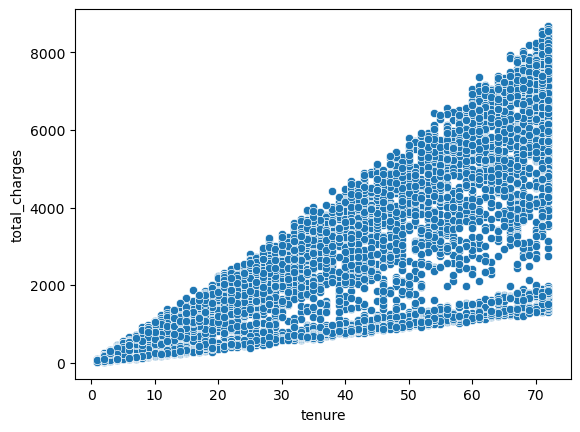

In [45]:
sns.scatterplot(data=df,x='tenure',y='total_charges');

In [36]:
# calculate appropriate test statistic and p-value
stats.pearsonr(df.tenure,df.total_charges)

PearsonRResult(statistic=0.8258804609332071, pvalue=0.0)

since pvalue<alpha, so we refect the Ho.
This conclude there is strong relation between tenure and total_charges.

### What happens if you control for phone and internet service?

In [37]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


In [38]:
df.phone_service.unique()

array(['Yes', 'No'], dtype=object)

In [39]:
df.internet_service_type_id.unique()

array([1, 2, 3])

In [52]:
df.phone_service.value_counts()

phone_service
Yes    6352
No      680
Name: count, dtype: int64

In [53]:
df.internet_service_type_id.value_counts()

internet_service_type_id
2    3096
1    2416
3    1520
Name: count, dtype: int64

In [ ]:
df.internet_service_type.value_counts()


In [55]:
def run_pearsonr(df):
    r,p = stats.pearsonr(df.monthly_charges, df.tenure)
    return pd.Series((r,p))

In [58]:
df.groupby(['phone_service','internet_service_type_id']).apply(run_pearsonr)


0              1
phone_service internet_service_type_id                         
No            1                         0.592430   1.173274e-65
Yes           1                         0.658094  5.781402e-216
              2                         0.624621   0.000000e+00
              3                         0.346188   4.896605e-44

For all of these groupings, the p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude there is a linear relationship for monthly charges and tenure when we control for phone service and internet service type.

# Q3) Use the employees database.

### Is there a relationship between how long an employee has been with the company and their salary?

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [59]:
import env
import pandas as pd
from scipy import stats

In [60]:
def get_db_url(hostname, username, password,database):
        return f"mysql+pymysql://{username}:{password}@{hostname}/{database}"

    

In [61]:
url=get_db_url(env.hostname,env.username,env.password,'employees')

### Is there a relationship between how long an employee has been with the company and their salary?


In [62]:
query = """
    select *
from employees
	join salaries
		using (emp_no)
where to_date > now()
    """


In [63]:
df=pd.read_sql(query,url)
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


set up Hypothesis:

Ho: There is no linear relation between how long an employee has been with the company and their salary.


Ha: There is linear relation between how long an employee has been with the company and their salary.


In [64]:
alpha=0.05

In [65]:
df['tenure']=df.to_date-df.hire_date

In [66]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,"2926512 days, 0:00:00"
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,"2926729 days, 0:00:00"
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,"2926449 days, 0:00:00"
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,"2926354 days, 0:00:00"
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,"2925338 days, 0:00:00"


In [67]:
df.tenure.head()

0    2926512 days, 0:00:00
1    2926729 days, 0:00:00
2    2926449 days, 0:00:00
3    2926354 days, 0:00:00
4    2925338 days, 0:00:00
Name: tenure, dtype: object

In [68]:
df.tenure = df.tenure.astype('str').str.split(expand=True)[0]


In [71]:
df.tenure=df.tenure.astype(float)

<Axes: xlabel='tenure', ylabel='salary'>

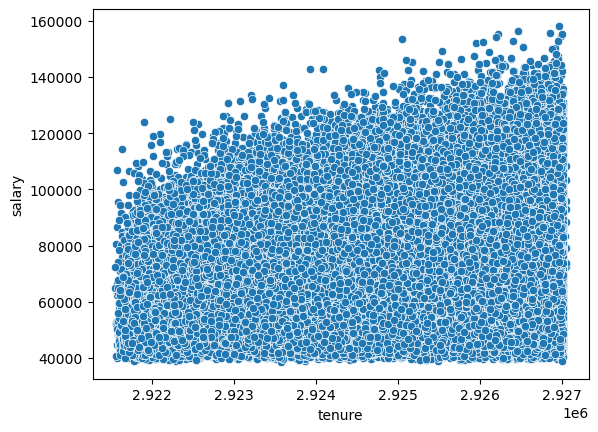

In [72]:
sns.scatterplot(data=df,x='tenure',y='salary')


In [73]:
stats.pearsonr(df.tenure,df.salary)

PearsonRResult(statistic=0.30646256131860095, pvalue=0.0)

since p<alpha, so we reject Ho.
This concludes there is weak relation between tenure and salary.

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?



In [74]:
query='''
select emp_no, count(title) as title_cnt
, datediff(max(to_date), hire_date) as tenure_days
from employees
	join titles
		using (emp_no)
group by emp_no
having max(to_date) > now()

'''

In [75]:
df=pd.read_sql(query,url)
df.head()

,emp_no,title_cnt,tenure_days
0,10001,1,2926512
1,10002,1,2926729
2,10003,1,2926449
3,10004,2,2926354
4,10005,2,2925338


<Axes: xlabel='tenure_days', ylabel='title_cnt'>

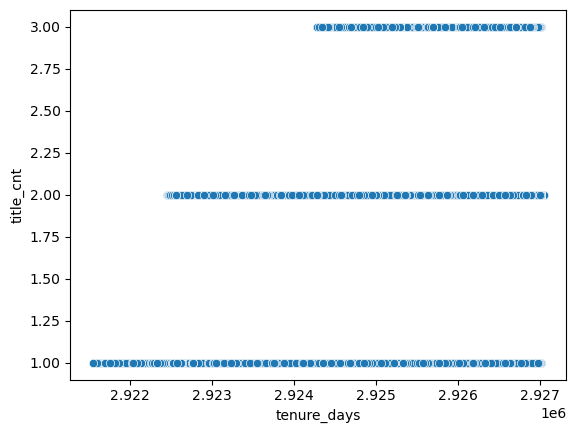

In [76]:
sns.scatterplot(data=df, x='tenure_days', y='title_cnt')


In [77]:
stats.pearsonr(df.tenure_days,df.title_cnt)

PearsonRResult(statistic=0.2871267889704716, pvalue=0.0)

since p-value<alpha, so we reject Ho.
There is a linear relationship between tenure and no. of titles.

# Q4) Use the sleepstudy data.

### Is there a relationship between days and reaction time?

In [46]:
from pydataset import data

In [47]:
df_sl=data('sleepstudy')
df_sl.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


<Axes: >

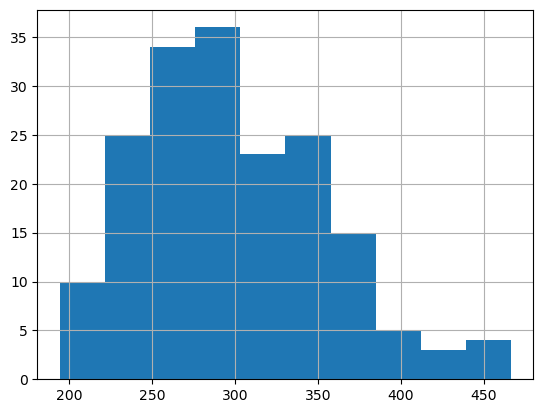

In [49]:
df_sl.Reaction.hist()

<Axes: xlabel='Days', ylabel='Reaction'>

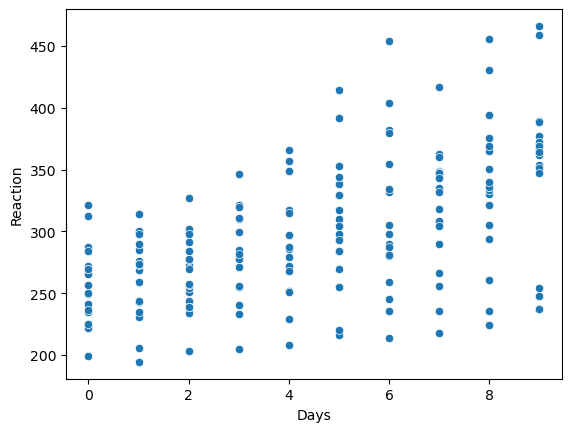

In [50]:
sns.scatterplot(data=df_sl,x='Days',y='Reaction')

In [51]:
stats.pearsonr(df_sl.Days,df_sl.Reaction)

PearsonRResult(statistic=0.5352302262650255, pvalue=9.894096322214486e-15)

since p<alpha, so we reject Ho.
this concludes that there is a linear relation between days and reaction time.